# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


In [3]:
from pprint import pprint

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [15]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"+"APPID="+ weather_api_key

In [16]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]      
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | talcahuano
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | saint-leu
Processing Record 5 of Set 1 | midleton
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | hami
Processing Record 10 of Set 1 | stiens
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | lompoc
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | haiku-pauwela
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | hithadhoo
Processing Record 17 of Set 1 | kyshtovka
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | taoudenni
Processing Record 20 of Set 1 | anadyr
Processing Record 21 of Set 1 | lethem
Processing Record 22 of Set 1 | blackmans bay
Processing Re

Processing Record 40 of Set 4 | isla vista
Processing Record 41 of Set 4 | mount isa
Processing Record 42 of Set 4 | kampong chhnang
Processing Record 43 of Set 4 | la passe
Processing Record 44 of Set 4 | penonome
Processing Record 45 of Set 4 | bredasdorp
Processing Record 46 of Set 4 | zonguldak
Processing Record 47 of Set 4 | gamba
Processing Record 48 of Set 4 | noosa heads
Processing Record 49 of Set 4 | margate
Processing Record 0 of Set 5 | vaasa
Processing Record 1 of Set 5 | sola
Processing Record 2 of Set 5 | santo antonio
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | pajok
Processing Record 5 of Set 5 | fianarantsoa
Processing Record 6 of Set 5 | xichang
Processing Record 7 of Set 5 | acapulco de juarez
Processing Record 8 of Set 5 | pechora
Processing Record 9 of Set 5 | hadibu
Processing Record 10 of Set 5 | coquimbo
Processing Record 11 of Set 5 | tobi village
City not found. Skipping...
Processing Record 12 of Set 5 | argo
Processing Reco

Processing Record 36 of Set 8 | cabo san lucas
Processing Record 37 of Set 8 | nieuw amsterdam
Processing Record 38 of Set 8 | fortuna
Processing Record 39 of Set 8 | ust'-uda
Processing Record 40 of Set 8 | lerwick
Processing Record 41 of Set 8 | la'ie
Processing Record 42 of Set 8 | okhotsk
Processing Record 43 of Set 8 | salinas
Processing Record 44 of Set 8 | lagrange
Processing Record 45 of Set 8 | kabalo
Processing Record 46 of Set 8 | komatipoort
Processing Record 47 of Set 8 | tsiombe
Processing Record 48 of Set 8 | obo
Processing Record 49 of Set 8 | santa cruz
Processing Record 0 of Set 9 | porto torres
Processing Record 1 of Set 9 | chibougamau
Processing Record 2 of Set 9 | america dourada
Processing Record 3 of Set 9 | devarkonda
Processing Record 4 of Set 9 | zemetchino
Processing Record 5 of Set 9 | fortaleza
Processing Record 6 of Set 9 | villanueva de cordoba
Processing Record 7 of Set 9 | tateyama
Processing Record 8 of Set 9 | peace river
Processing Record 9 of Set 9

Processing Record 25 of Set 12 | campos belos
Processing Record 26 of Set 12 | tazovsky
Processing Record 27 of Set 12 | hobyo
Processing Record 28 of Set 12 | mugia
Processing Record 29 of Set 12 | mandal
Processing Record 30 of Set 12 | chak jhumra
Processing Record 31 of Set 12 | new norfolk
Processing Record 32 of Set 12 | santa marta de ortigueira
Processing Record 33 of Set 12 | rio grande
Processing Record 34 of Set 12 | xining
Processing Record 35 of Set 12 | kolwezi
Processing Record 36 of Set 12 | santiago de cuba
Processing Record 37 of Set 12 | jayapura
Processing Record 38 of Set 12 | rupert
Processing Record 39 of Set 12 | san jose village
City not found. Skipping...
Processing Record 40 of Set 12 | baneh
-----------------------------
Data Retrieval Complete      
-----------------------------


In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          1150
Lat           1150
Lng           1150
Max Temp      1150
Humidity      1150
Cloudiness    1150
Wind Speed    1150
Country       1150
Date          1150
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talcahuano,-36.7167,-73.1167,46.08,100,58,0.00,CL,1690424259
1,port-aux-francais,-49.3500,70.2167,39.99,78,90,36.06,TF,1690424269
2,port alfred,-33.5906,26.8910,61.41,82,92,10.67,ZA,1690424269
3,saint-leu,-21.1500,55.2833,65.26,76,47,11.68,RE,1690424269
4,midleton,51.9153,-8.1805,61.12,97,100,11.10,IE,1690424269


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talcahuano,-36.7167,-73.1167,46.08,100,58,0.00,CL,1690424259
1,port-aux-francais,-49.3500,70.2167,39.99,78,90,36.06,TF,1690424269
2,port alfred,-33.5906,26.8910,61.41,82,92,10.67,ZA,1690424269
3,saint-leu,-21.1500,55.2833,65.26,76,47,11.68,RE,1690424269
4,midleton,51.9153,-8.1805,61.12,97,100,11.10,IE,1690424269


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

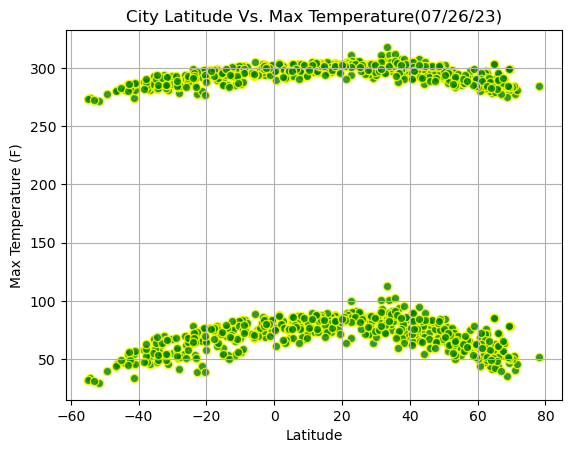

In [88]:
import datetime

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],
           edgecolor="yellow", linewidth=1, c='Green', marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
datetime_obj = datetime.datetime.fromtimestamp(city_data_df.loc[0,"Date"])
date_str = datetime_obj.date().strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

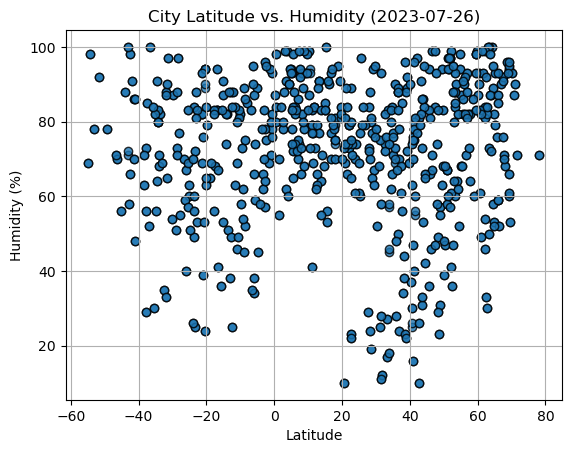

In [39]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors='black', alpha=0.8)

# Incorporate the other graph properties
datetime_obj = datetime.datetime.fromtimestamp(city_data_df.loc[0,"Date"])
date_str = datetime_obj.date().strftime("%Y-%m-%d")

# YOUR CODE HERE
plt.title(f"City Latitude vs. Humidity ({date_str})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

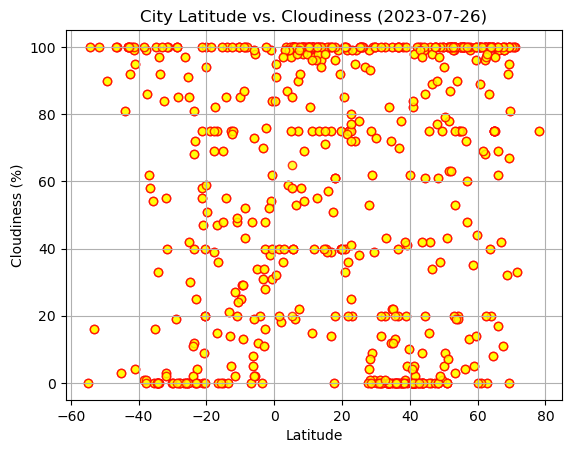

In [51]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],c='yellow', marker="o", edgecolors='red', alpha=0.8)

# Incorporate the other graph properties
datetime_obj = datetime.datetime.fromtimestamp(city_data_df.loc[0,"Date"])
date_str = datetime_obj.date().strftime("%Y-%m-%d")

# YOUR CODE HERE
plt.title(f"City Latitude vs. Cloudiness ({date_str})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

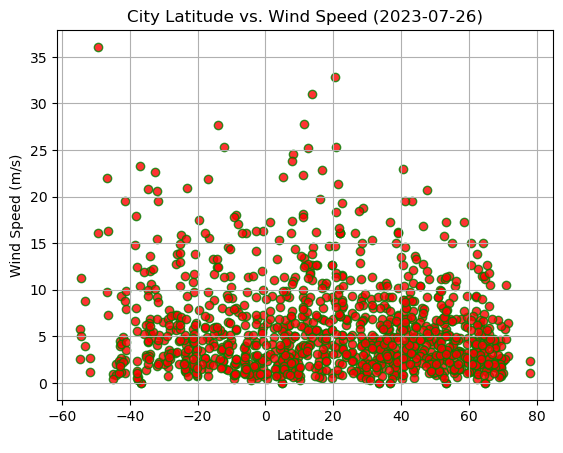

In [89]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"],c="red", marker="o", edgecolors='green', alpha=0.8)
# Incorporate the other graph properties
datetime_obj = datetime.datetime.fromtimestamp(city_data_df.loc[0,"Date"])
date_str = datetime_obj.date().strftime("%Y-%m-%d")
# YOUR CODE HERE
plt.title(f"City Latitude vs. Wind Speed ({date_str})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [75]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,Title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(Title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [69]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,midleton,51.9153,-8.1805,61.12,97,100,11.10,IE,1690424269
8,hami,42.8000,93.4500,94.50,10,0,9.73,CN,1690424033
9,stiens,53.2623,5.7577,59.99,84,100,5.75,NL,1690424269
11,lompoc,34.6391,-120.4579,75.34,84,100,10.36,US,1690424270
13,haiku-pauwela,20.9219,-156.3051,83.17,69,40,25.32,US,1690424270


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,talcahuano,-36.7167,-73.1167,46.08,100,58,0.00,CL,1690424259
1,port-aux-francais,-49.3500,70.2167,39.99,78,90,36.06,TF,1690424269
2,port alfred,-33.5906,26.8910,61.41,82,92,10.67,ZA,1690424269
3,saint-leu,-21.1500,55.2833,65.26,76,47,11.68,RE,1690424269
5,port elizabeth,-33.9180,25.5701,53.89,71,0,6.91,ZA,1690424269


###  Temperature vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-squared is: -0.0524970264742679


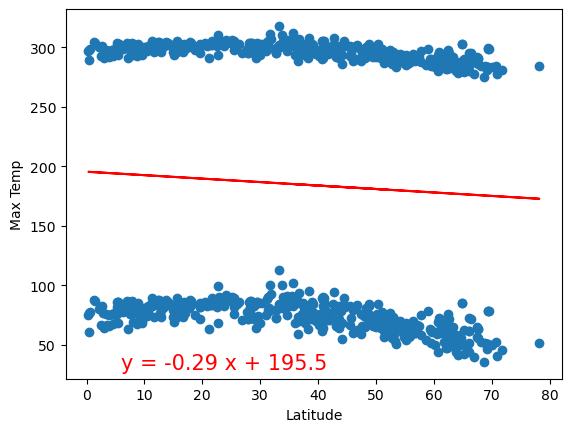

In [78]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-squared is: 0.06764180452543818


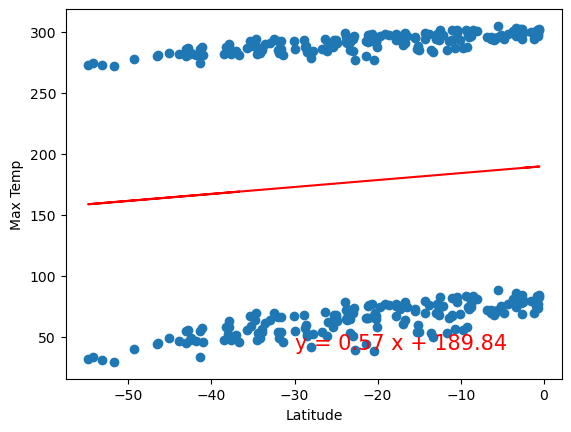

In [90]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-squared is: -0.04934544432214715


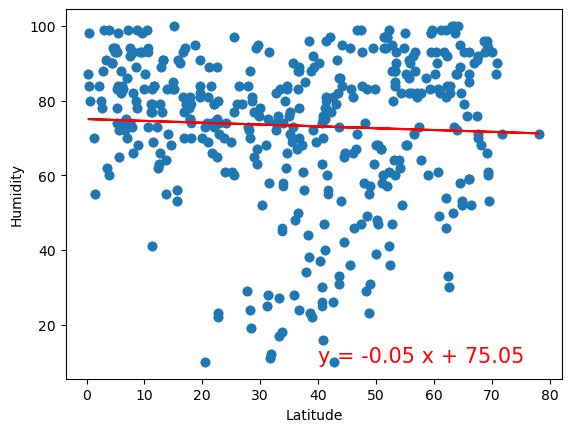

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-squared is: -0.03767031940284211


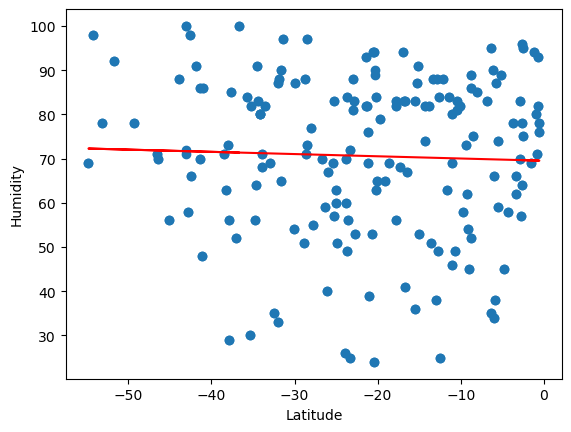

In [80]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (0,150))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-squared is: -0.046016599351659485


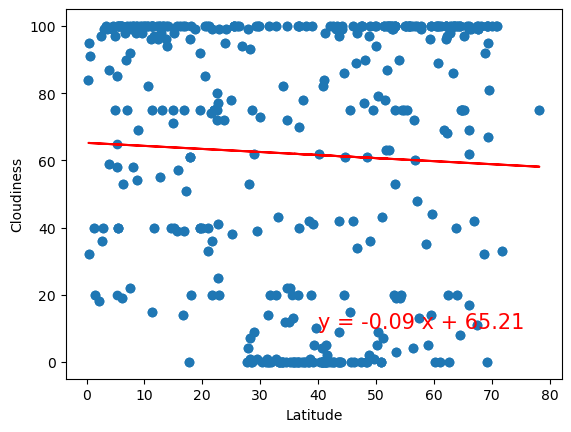

In [81]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-squared is: -0.11474004424568972


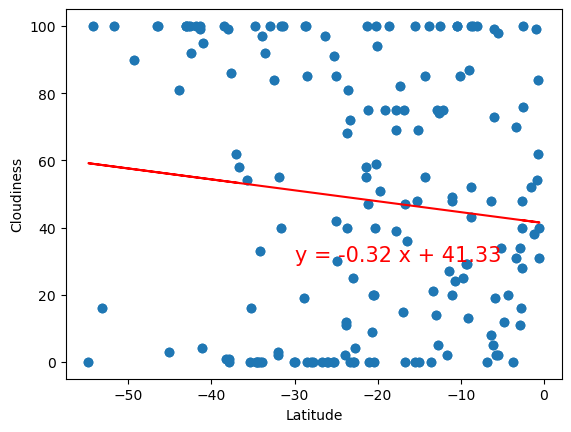

In [82]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-squared is: -0.17167860720833333


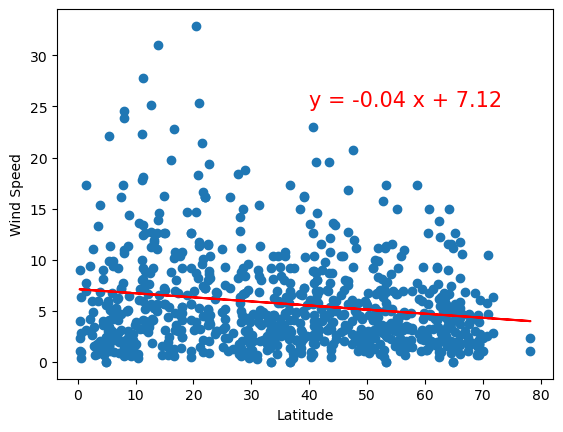

In [83]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (40,25))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
The r-squared is: -0.09875198662365077


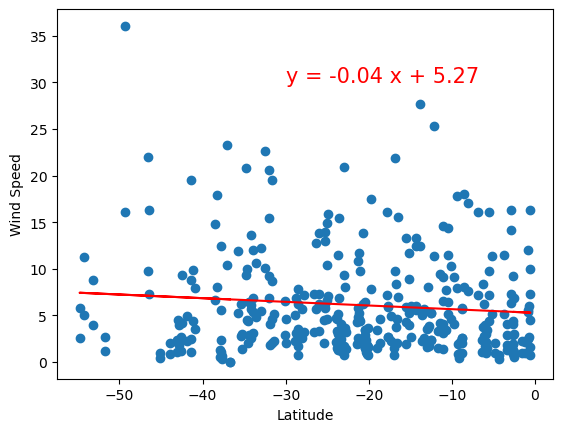

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE